# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import warnings
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from phik import resources, report
from phik.report import plot_correlation_matrix
warnings.filterwarnings(action='ignore')

# Problem Statement:

The objective of this project is to analyze customer data and identify meaningful clusters within the dataset. The dataset contains information about customers, including their gender, profession, age, annual income, spending score, work experience, and family size. The main challenge is to determine the optimal number of clusters and assign customers to their respective clusters based on their similarities.

The problem statement can be further refined as follows:

`Data Overview:` Explore and understand the customer dataset, including the available features, their distributions, and potential relationships between them.
Cluster Analysis: Apply clustering algorithms, such as K-means, to identify distinct groups of customers based on their characteristics. Evaluate the clustering performance using appropriate metrics.

`Data Understanding:` Gain a comprehensive understanding of the customer dataset, including the meaning and significance of each feature, the data types, and potential missing or erroneous values. Perform data cleaning and preprocessing as necessary.
Descriptive Statistics: Compute descriptive statistics for each feature, such as measures of central tendency, variability, and distributions. Analyze the summary statistics to identify any notable trends or patterns in the data.
Feature Relationships: Explore the relationships between different features in the dataset. Investigate correlations, associations, or dependencies between variables to uncover potential insights and understand how different factors interact with each other.

`Data Visualization:` Utilize various visualization techniques, such as histograms, scatter plots, box plots, or heatmaps, to visually represent the data and discover patterns, outliers, or anomalies. Visualize the distributions, relationships, and trends within the dataset.
Customer Profiling: Create customer profiles or segments based on the available features. Analyze the characteristics, preferences, or behaviors of different customer groups to understand their distinct traits and potential implications for business strategies.

`Insights and Recommendations:` Derive actionable insights from the EDA findings and provide recommendations for business decision-making. Identify potential areas of improvement, marketing strategies, or targeted campaigns based on the discovered patterns and customer insights.
The goal of this project is to conduct a thorough exploratory analysis of the customer dataset, uncover key trends, relationships, and patterns, and provide actionable insights to support strategic business decisions. The EDA process aims to enhance the understanding of the customers, their preferences, and behaviors, enabling the organization to optimize marketing efforts, improve customer satisfaction, and drive business growth.

`Optimal Number of Clusters:` Determine the optimal number of clusters by utilizing techniques like the Elbow Method and Silhouette Analysis. Find the number of clusters that provides a balance between compactness within clusters and separation between clusters.

`Customer Segmentation:` Assign each customer to the identified clusters based on their feature similarities. Analyze the characteristics and behaviors of customers within each cluster to gain insights and understand different customer segments.
Evaluation and Interpretation: Evaluate the quality and interpretability of the obtained clusters. Assess the effectiveness of the clustering solution in providing meaningful and actionable insights for business decision-making.

`Visualization:` Visualize the customer clusters in a meaningful way, such as scatter plots or other relevant visualizations, to facilitate a clear understanding of the identified segments.

`Recommendations:` Based on the analysis and understanding of customer clusters, provide recommendations and actionable insights to the business stakeholders. These recommendations may include targeted marketing strategies, personalized customer experiences, or tailored product offerings for different customer segments.
The goal of this project is to leverage clustering techniques and customer segmentation to provide valuable insights for strategic business decisions, improve customer targeting, and enhance overall customer satisfaction and business performance.

# DATA LOADING

In [3]:
df = pd.read_csv("Customers.csv")

In [4]:
df.shape

(2000, 8)

In [5]:
df

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                1            4  
1          Engineer                3            3  
2          Engineer                1            1  
3            Lawyer                0            2  
4     Entertainment                2            6  
...             ...              ...          ...  
1995         Artist                8            7  
1996         Doctor                7            7  
1997     Healthcare                9            2  
1998      Executive                7            2  
1999  Entertainment                5            2  

[2000 rows x 8 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [7]:
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

# DATA PREPARATION

### CHECKING MISSING VALUE AND DUPLICATED DATA

In [8]:
data_details = {'unique':df.nunique(),
              'dtype':df.dtypes,
             'null':df.isna().sum(),
             'null %':df.isna().sum()/len(df),
             'duplicated':df.duplicated().value_counts()
             }
data_details = pd.DataFrame(data_details)
data_details

unique   dtype  null  null %  duplicated
Age                      100.0   int64   0.0  0.0000         NaN
Annual Income ($)       1786.0   int64   0.0  0.0000         NaN
CustomerID              2000.0   int64   0.0  0.0000         NaN
Family Size                9.0   int64   0.0  0.0000         NaN
Gender                     2.0  object   0.0  0.0000         NaN
Profession                 9.0  object  35.0  0.0175         NaN
Spending Score (1-100)   101.0   int64   0.0  0.0000         NaN
Work Experience           18.0   int64   0.0  0.0000         NaN
False                      NaN     NaN   NaN     NaN      2000.0

In [9]:
df.dropna(inplace=True)

### Droping unused coloumn

In [10]:
df.drop(['CustomerID'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYS

In [11]:
df.describe().transpose()

count           mean           std  min      25%  \
Age                     1965.0      48.894656     28.414889  0.0     25.0   
Annual Income ($)       1965.0  110616.009669  45833.860195  0.0  74350.0   
Spending Score (1-100)  1965.0      51.078880     27.977176  0.0     28.0   
Work Experience         1965.0       4.092621      3.926459  0.0      1.0   
Family Size             1965.0       3.757252      1.968335  1.0      2.0   

                             50%       75%       max  
Age                         48.0      73.0      99.0  
Annual Income ($)       109759.0  149095.0  189974.0  
Spending Score (1-100)      50.0      75.0     100.0  
Work Experience              3.0       7.0      17.0  
Family Size                  4.0       5.0       9.0


Gender counts:
 Female    1166
Male       799
Name: Gender, dtype: int64


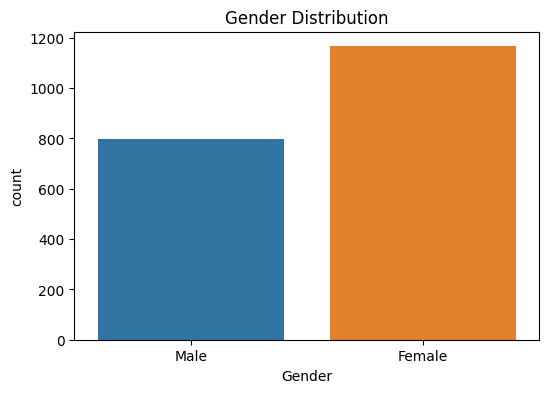

In [12]:
gender_counts = df['Gender'].value_counts()
print("\nGender counts:\n", gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(df, x='Gender')
plt.title('Gender Distribution')
plt.show()


Age statistics:
 count    1965.000000
mean       48.894656
std        28.414889
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64


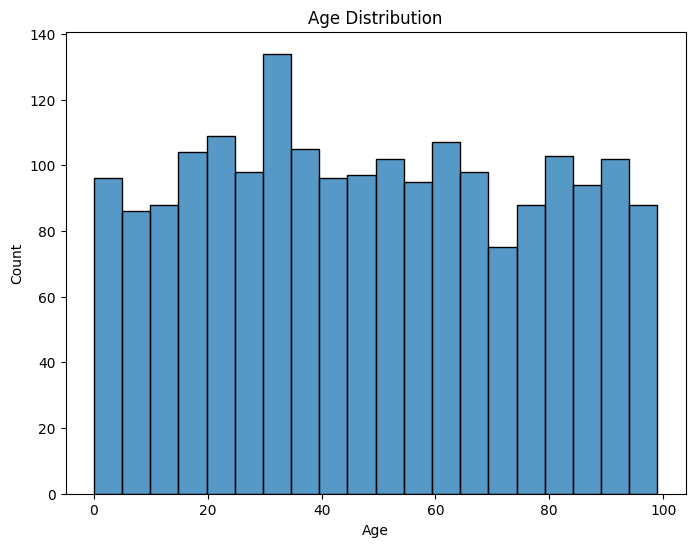

In [13]:
# Age
print("\nAge statistics:\n", df['Age'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()


Annual Income statistics:
 count      1965.000000
mean     110616.009669
std       45833.860195
min           0.000000
25%       74350.000000
50%      109759.000000
75%      149095.000000
max      189974.000000
Name: Annual Income ($), dtype: float64


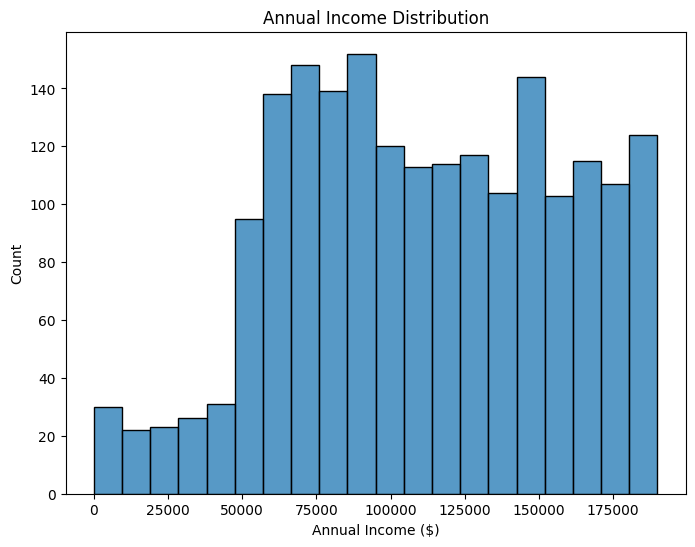

In [14]:
print("\nAnnual Income statistics:\n", df['Annual Income ($)'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df, x='Annual Income ($)', bins=20)
plt.title('Annual Income Distribution')
plt.show()


Spending Score statistics:
 count    1965.000000
mean       51.078880
std        27.977176
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.000000
Name: Spending Score (1-100), dtype: float64


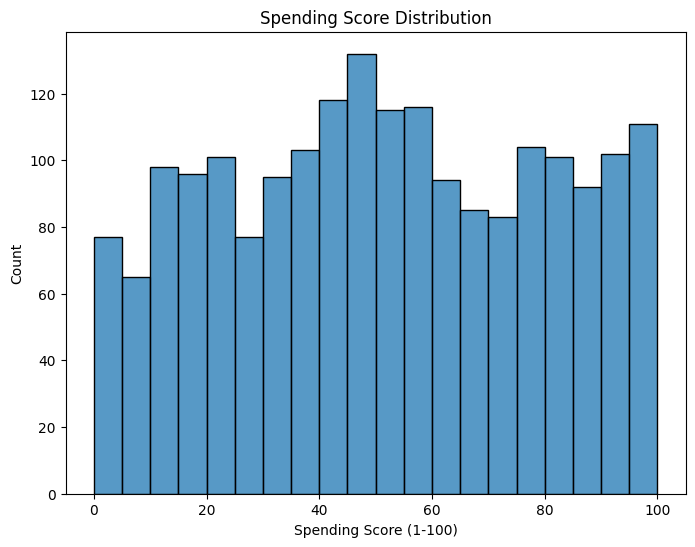

In [15]:
print("\nSpending Score statistics:\n", df['Spending Score (1-100)'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df, x='Spending Score (1-100)', bins=20)
plt.title('Spending Score Distribution')
plt.show()


Profession counts:
 Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64


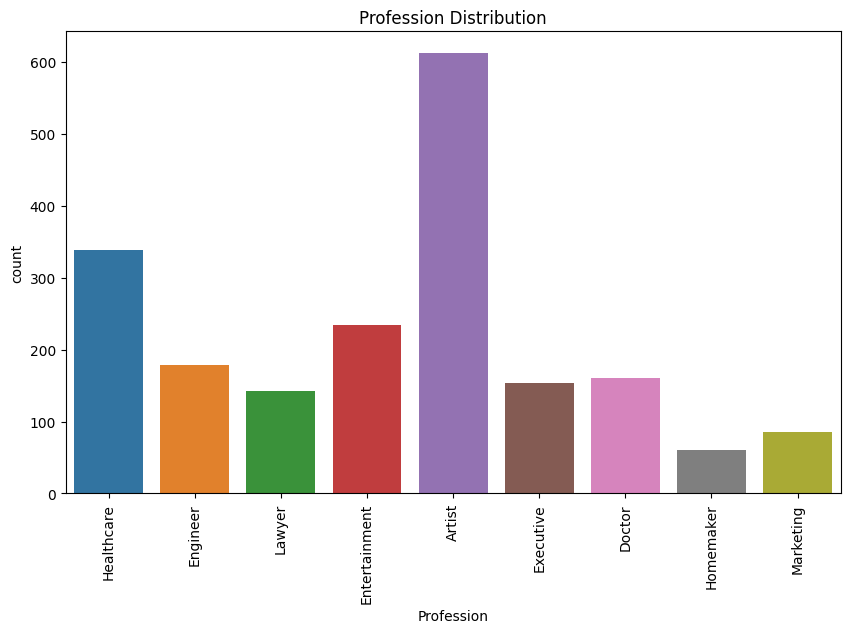

In [16]:
# Profession
profession_counts = df['Profession'].value_counts()
print("\nProfession counts:\n", profession_counts)

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Profession')
plt.title('Profession Distribution')
plt.xticks(rotation=90)
plt.show()


Work Experience statistics:
 count    1965.000000
mean        4.092621
std         3.926459
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: Work Experience, dtype: float64


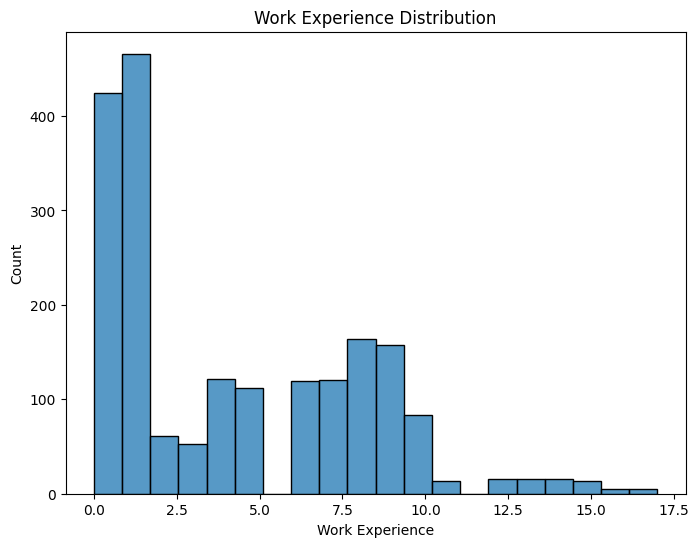

In [17]:
# Work Experience
print("\nWork Experience statistics:\n", df['Work Experience'].describe())

plt.figure(figsize=(8, 6))
sns.histplot(df, x='Work Experience', bins=20)
plt.title('Work Experience Distribution')
plt.show()


Family Size counts:
 2    359
3    308
1    294
4    281
5    252
6    240
7    226
8      4
9      1
Name: Family Size, dtype: int64


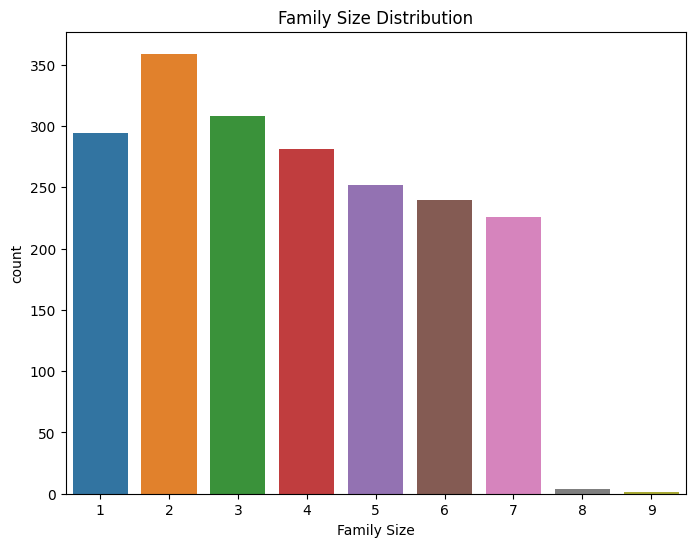

In [18]:
# Family Size
family_size_counts = df['Family Size'].value_counts()
print("\nFamily Size counts:\n", family_size_counts)

plt.figure(figsize=(8, 6))
sns.countplot(df, x='Family Size')
plt.title('Family Size Distribution')
plt.show()

Based on the summary statistics for each variable grouped by the "Profession" category, we can draw the following conclusions:

`Age:`

-The mean age ranges from approximately 45 to 55 across different professions.

-There is variation in age within each profession, as indicated by the standard deviation.

-The median age falls around 47 to 50 for most professions.


`Annual Income ($):`

-The mean and median annual incomes vary across professions, ranging from approximately $107,000 to $113,000.

-There is some variation in annual income within each profession, as indicated by the standard deviation.


`Spending Score (1-100):`

-The mean spending score ranges from around 48 to 53 across professions.

-There is variation in spending scores within each profession, as indicated by the standard deviation.

-The median spending score is relatively consistent, falling around 46 to 53 for most professions.


`Work Experience:`

-The mean work experience ranges from approximately 3.5 to 4.5 years across professions.

-There is variation in work experience within each profession, as indicated by the standard deviation.

-The median work experience varies, with some professions having a median of 1 year and others around 3 to 4 years.


`Family Size:`

-The mean family size ranges from approximately 3.6 to 4 for different professions.

-There is some variation in family size within each profession, as indicated by the standard deviation.

-The median family size is relatively consistent, falling around 3 to 4 for most professions.


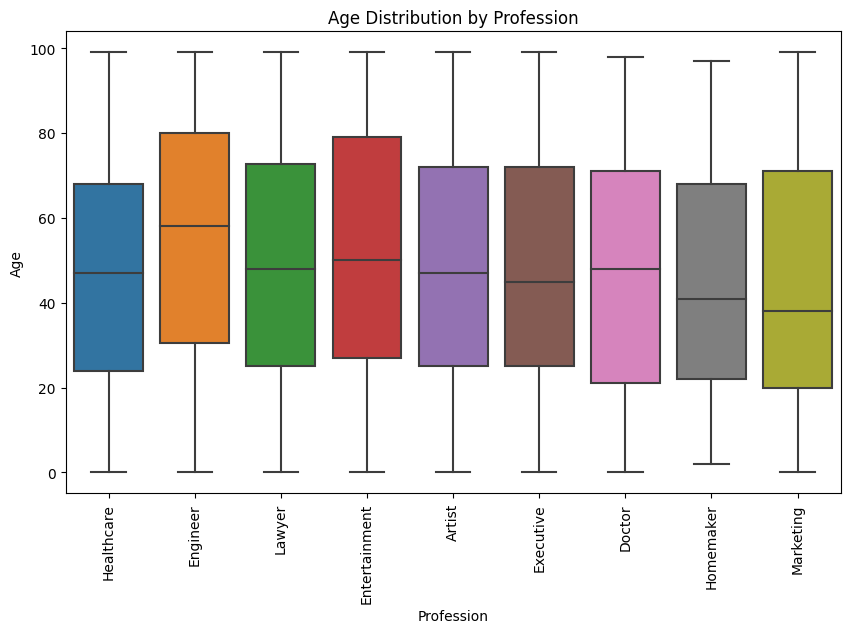

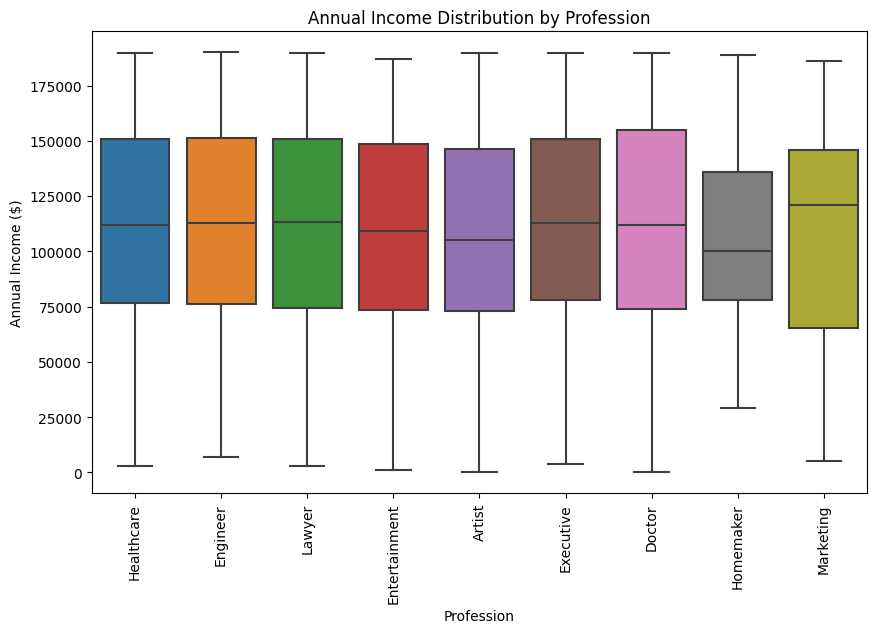

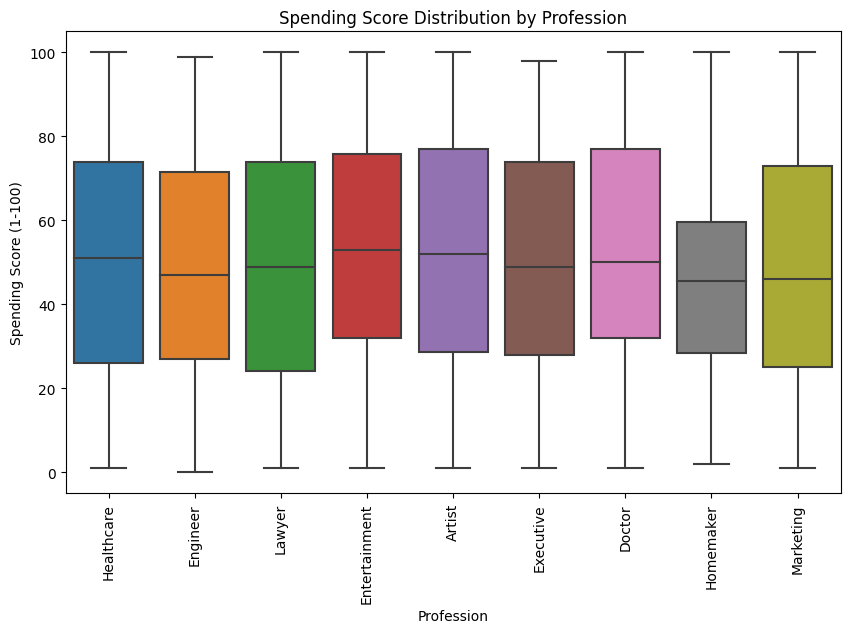

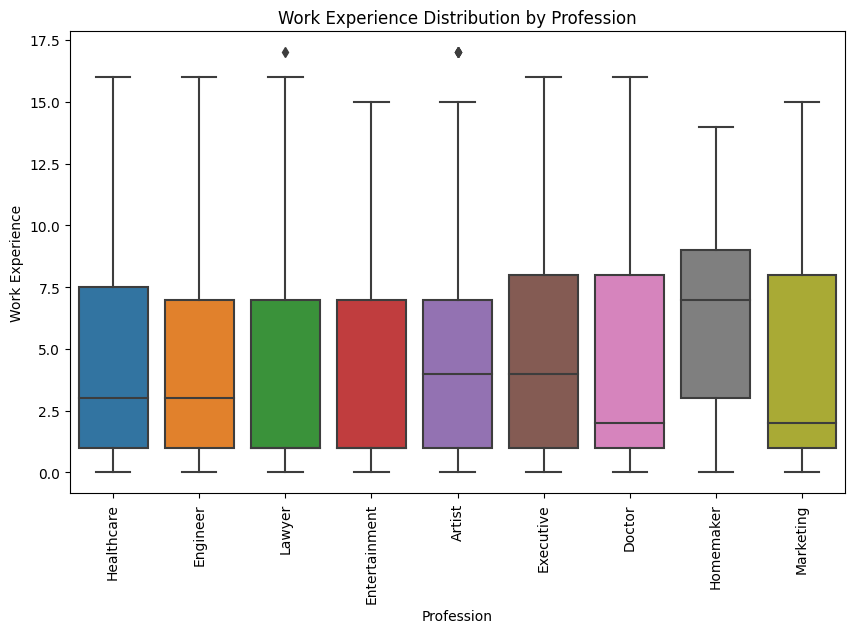

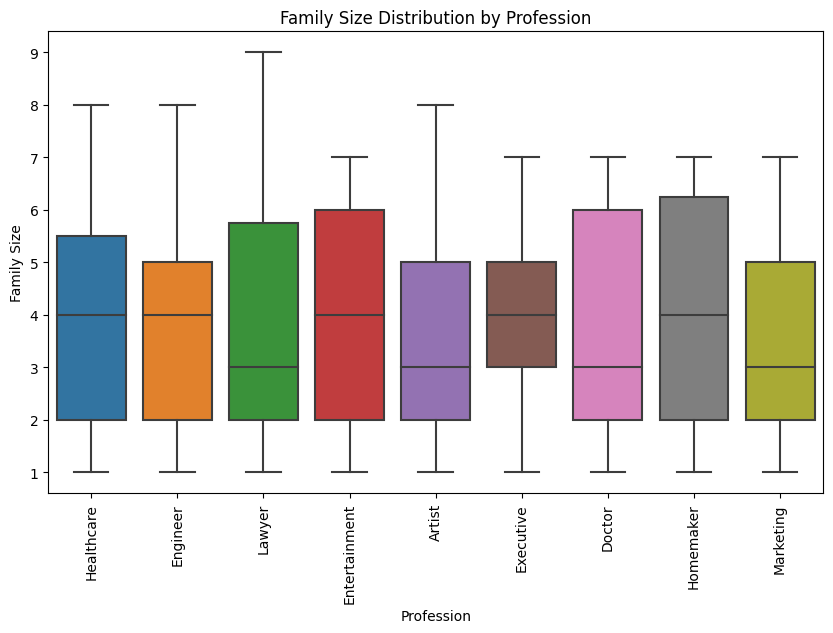

                     Age                   Annual Income ($)            \
                    mean median        std              mean    median   
Profession                                                               
Artist         49.004902   47.0  28.238839     108776.580065  105211.0   
Doctor         46.621118   48.0  28.771067     111573.217391  111871.0   
Engineer       55.094972   58.0  28.626556     111161.240223  112766.0   
Entertainment  51.162393   50.0  29.384372     110650.333333  109446.0   
Executive      46.601307   45.0  28.321077     113770.130719  112957.0   
Healthcare     47.843658   47.0  27.256871     112574.041298  111717.0   
Homemaker      45.366667   41.0  27.938168     108758.616667  100387.0   
Lawyer         47.753521   48.0  28.360693     110995.838028  113338.5   
Marketing      45.823529   38.0  29.819367     107994.211765  120899.0   

                            Spending Score (1-100)                    \
                        std            

In [19]:
# Box plots for Age by Profession
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Age')
plt.title('Age Distribution by Profession')
plt.xticks(rotation=90)
plt.show()

# Box plots for Annual Income by Profession
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Annual Income ($)')
plt.title('Annual Income Distribution by Profession')
plt.xticks(rotation=90)
plt.show()

# Box plots for Spending Score by Profession
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Profession')
plt.xticks(rotation=90)
plt.show()

# Box plots for Work Experience by Profession
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Work Experience')
plt.title('Work Experience Distribution by Profession')
plt.xticks(rotation=90)
plt.show()

# Box plots for Family Size by Profession
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Profession', y='Family Size')
plt.title('Family Size Distribution by Profession')
plt.xticks(rotation=90)
plt.show()

# Summary statistics for each variable grouped by profession category
profession_summary = df.groupby('Profession').agg({
    'Age': ['mean', 'median', 'std'],
    'Annual Income ($)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std'],
    'Work Experience': ['mean', 'median', 'std'],
    'Family Size': ['mean', 'median', 'std']
})
print(profession_summary)

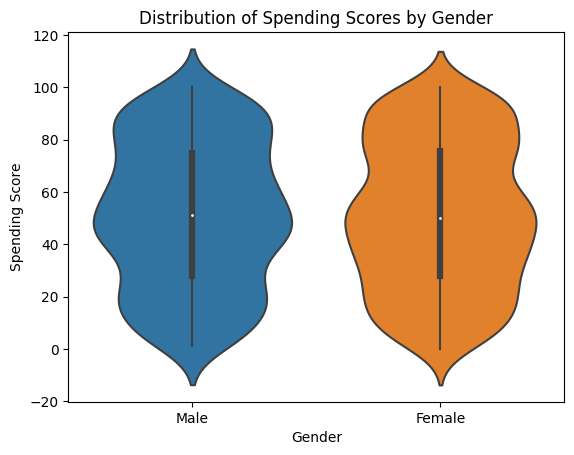

In [20]:
sns.violinplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.title('Distribution of Spending Scores by Gender')
plt.show()

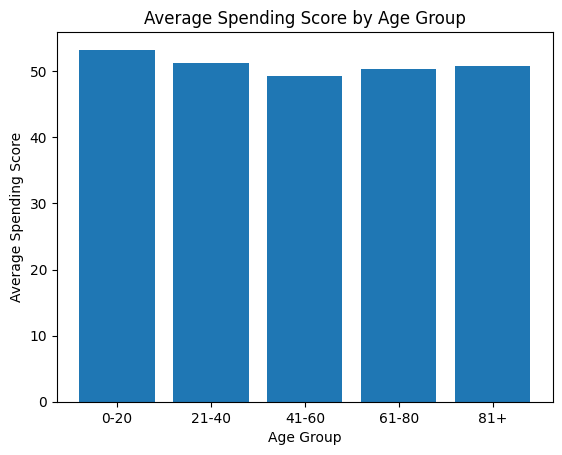

In [21]:
age_groups = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, np.inf], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
average_score_age = df.groupby(age_groups)['Spending Score (1-100)'].mean()
plt.bar(average_score_age.index, average_score_age)
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Age Group')
plt.show()

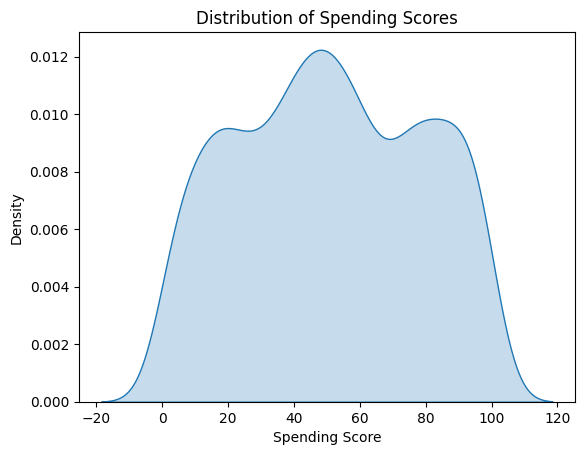

In [22]:
sns.kdeplot(df['Spending Score (1-100)'], shade=True)
plt.xlabel('Spending Score')
plt.ylabel('Density')
plt.title('Distribution of Spending Scores')
plt.show()

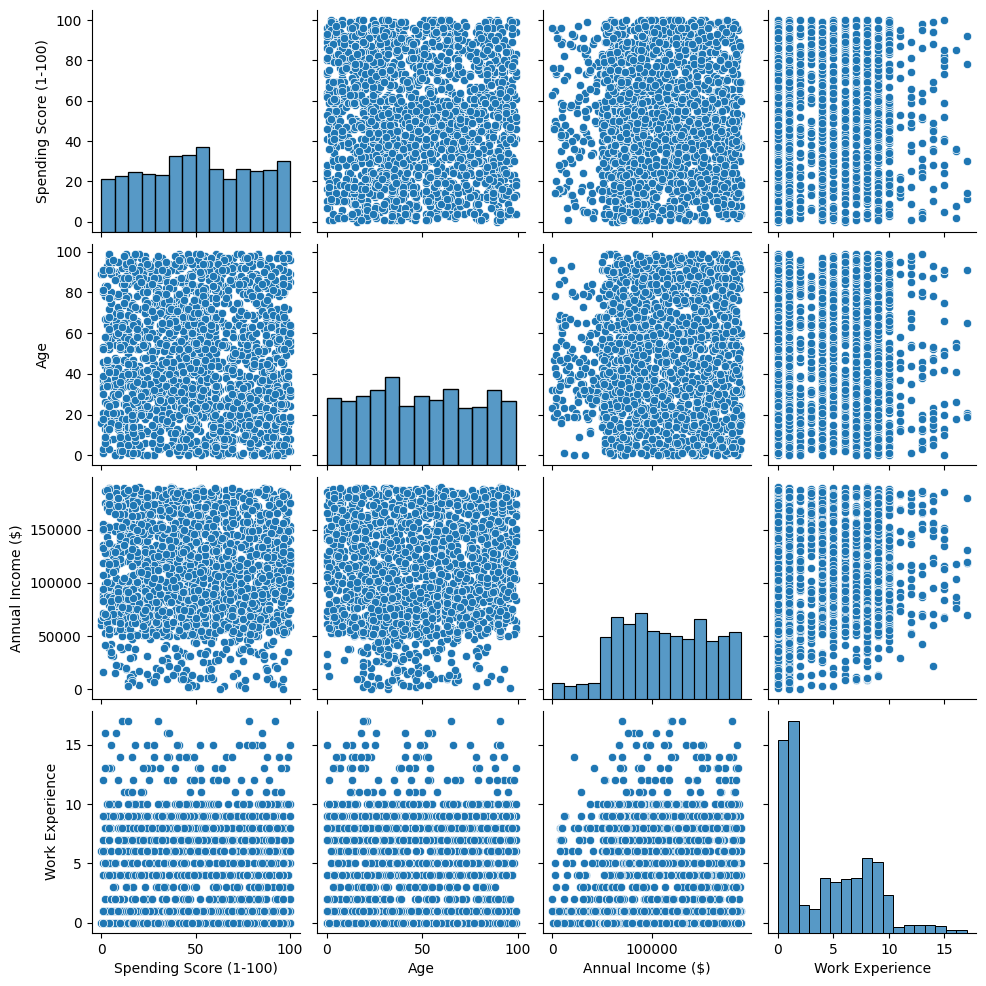

In [23]:
sns.pairplot(df, vars=['Spending Score (1-100)', 'Age', 'Annual Income ($)', 'Work Experience'])
plt.show()

interval columns not set, guessing: ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']


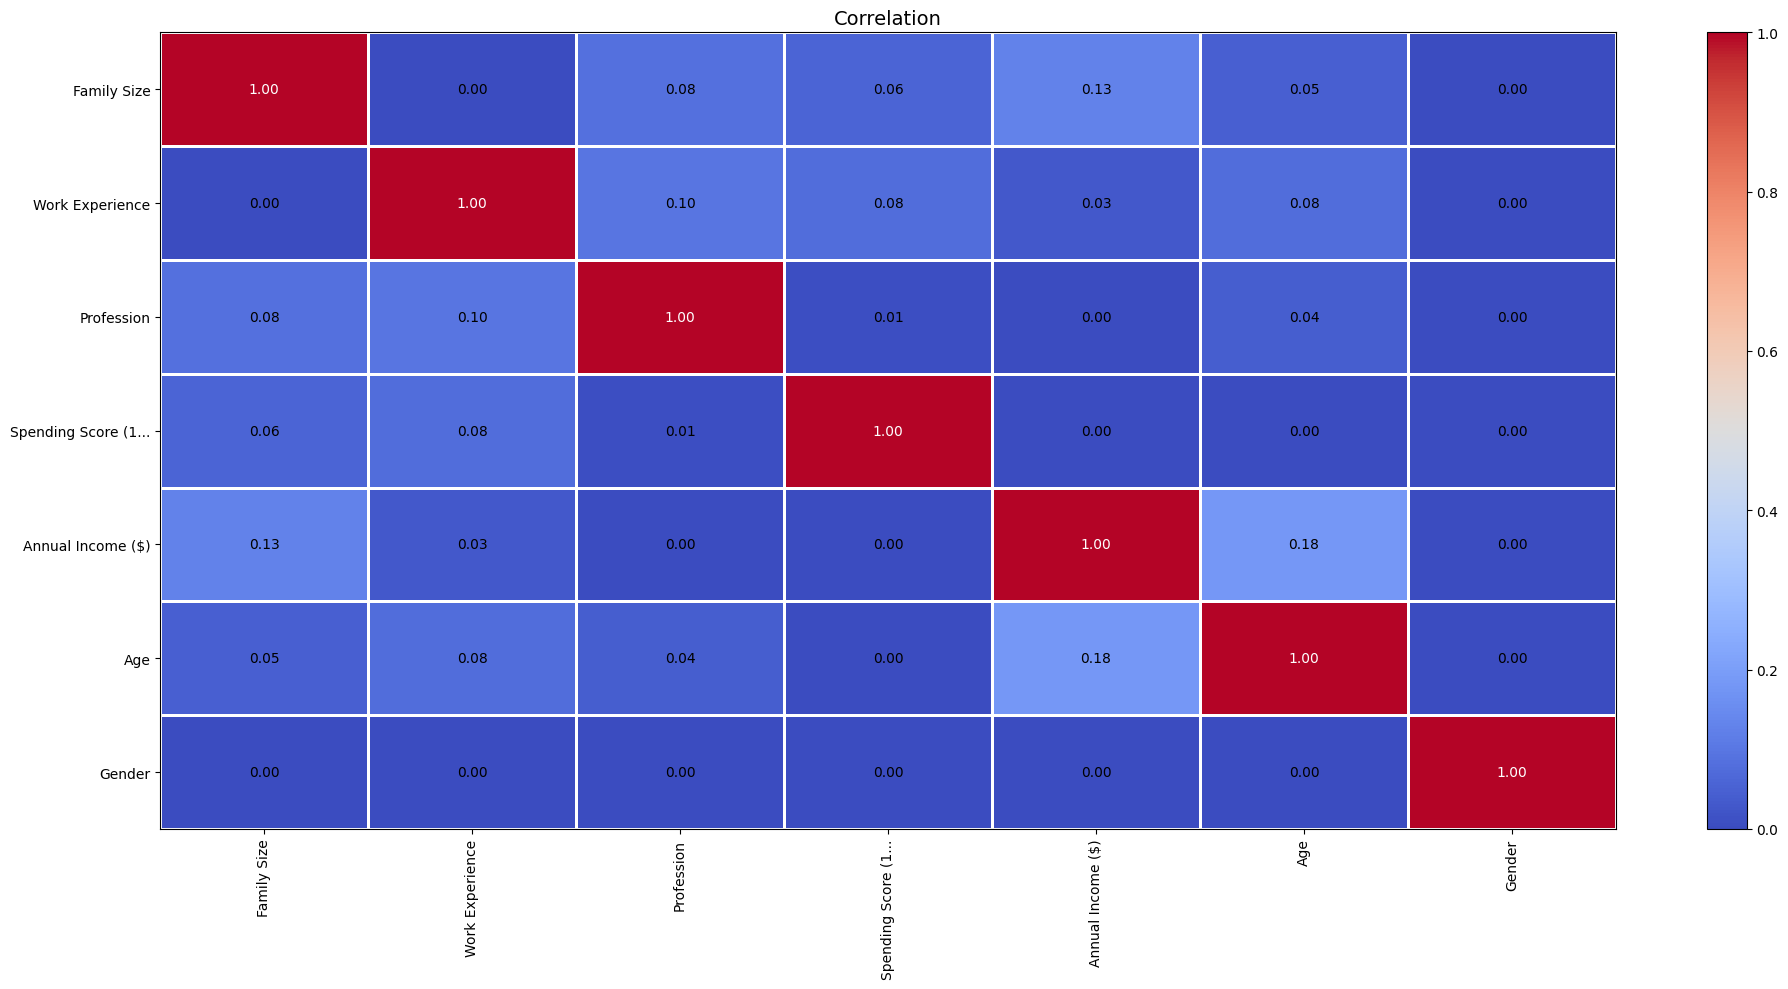

In [24]:
phik_corr = df.phik_matrix()

plot_correlation_matrix(phik_corr.values, 
                        x_labels=phik_corr.columns, 
                        y_labels=phik_corr.index, 
                        vmin=0, vmax=1, color_map='coolwarm', 
                        title=r'Correlation', 
                        figsize=(20,10))
plt.show()

# PREPROCESSING

### Features Encoder

In [25]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

### Features Scaler

In [26]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])


In [52]:
df['Annual Income ($)'].min()

0

In [27]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', cat_pipeline, ['Gender', 'Profession']),
        ('scaler', num_pipeline, ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']),
    ])

# Apply the transformations to the DataFrame
df_transformed = preprocessor.fit_transform(df)

In [28]:
df_transformed

array([[ 0.        ,  1.        ,  0.        , ..., -0.43185041,
        -0.78783663,  0.12335801],
       [ 0.        ,  1.        ,  0.        , ...,  1.06975542,
        -0.27834215, -0.38481491],
       [ 1.        ,  0.        ,  0.        , ..., -1.61168357,
        -0.78783663, -1.40116075],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.32566341,
         1.25014129, -0.89298783],
       [ 0.        ,  1.        ,  0.        , ..., -1.68318861,
         0.74064681, -0.89298783],
       [ 0.        ,  1.        ,  0.        , ...,  0.03293235,
         0.23115233, -0.89298783]])

In [29]:
preprocessor

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'Profession']),
                                ('scaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Annual Income ($)',
                                  'Spending Score (1-100)', 'Work Experience',
                                  'Family Size'])])

In [30]:
df_transformed

array([[ 0.        ,  1.        ,  0.        , ..., -0.43185041,
        -0.78783663,  0.12335801],
       [ 0.        ,  1.        ,  0.        , ...,  1.06975542,
        -0.27834215, -0.38481491],
       [ 1.        ,  0.        ,  0.        , ..., -1.61168357,
        -0.78783663, -1.40116075],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -1.32566341,
         1.25014129, -0.89298783],
       [ 0.        ,  1.        ,  0.        , ..., -1.68318861,
         0.74064681, -0.89298783],
       [ 0.        ,  1.        ,  0.        , ...,  0.03293235,
         0.23115233, -0.89298783]])

# DIMENSIONALITY REDUCTION

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

PCA (Principal Component Analysis) is a dimensionality reduction technique that is commonly used in clustering algorithms. While your dataset may have only 7 features and the correlation may not be very high, PCA can still provide benefits in certain scenarios:

`Improved Clustering Performance:`PCA can enhance clustering performance by reducing noise, focusing on the most informative features, and capturing the underlying structure or patterns in the data. It can help in cases where the original features do not exhibit clear separation or when there are overlapping clusters.

`Visualization`: PCA allows for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. This can help in gaining insights into the data, understanding cluster distributions, and identifying relationships between clusters.

`Computational Efficiency:` By reducing the dimensionality of the data, PCA can lead to computational efficiency gains, especially when dealing with large datasets. It reduces the number of calculations required for clustering algorithms.

In [31]:
# Instantiate a PCA object with 3 components for 3D data
pca = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_pca = pca.fit_transform(df_transformed)

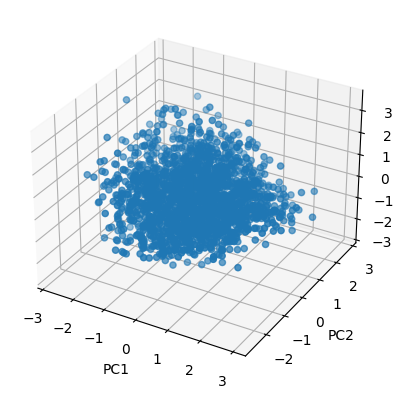

In [32]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2])

# Set labels for the three axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show the plot
plt.show()

# MODELING

Based on the plot of the sum of squared distances (inertia) against the number of clusters (K) using the elbow method, the elbow point is observed at K=6. This suggests that K=6 might be an appropriate number of clusters for the given dataset.

The elbow point is the point of inflection in the plot where the rate of decrease in inertia starts to diminish significantly. It indicates a trade-off between reducing inertia (which favors more clusters) and simplicity (which favors fewer clusters). The elbow point is often used as a heuristic to determine the optimal number of clusters.

In this case, K=6 is identified as the elbow point. This means that choosing K=6 provides a good balance between capturing the underlying structure of the data and avoiding overfitting or excessive complexity. However, it's important to note that the selection of the number of clusters is subjective and should also be evaluated based on domain knowledge and the specific goals of the analysis.

Therefore, based on the elbow point analysis, K=6 is a reasonable choice for the number of clusters in this dataset.

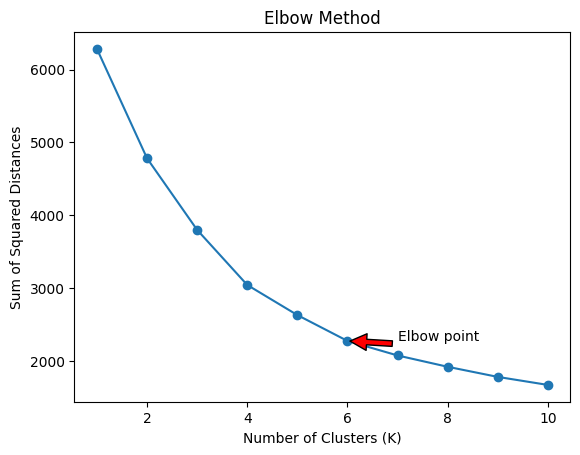

In [33]:
# Define a range of K values to try
k_values = range(1, 11)

# Initialize a list to store the sum of squared distances for each K
inertias = []

# Fit K-means clustering for different values of K and calculate the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    inertias.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters (K)
plt.plot(k_values, inertias, 'o-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

# Find the index of the elbow point
elbow_index = inertias.index(min(inertias, key=lambda x: abs(x - (max(inertias) - min(inertias)) / 2)))

# Annotate the elbow point on the plot
plt.annotate("Elbow point", xy=(k_values[elbow_index], inertias[elbow_index]),
             xytext=(k_values[elbow_index] + 1, inertias[elbow_index] - 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

## Silhouette Method
The Silhouette Method is a technique for evaluating the performance of clustering algorithms. It measures how similar a data point is to its own cluster compared to other clusters. It provides a score for each data point, which ranges from -1 to 1, where:

A score of 1 indicates that the data point is well-matched to its own cluster,
A score of 0 indicates that the data point is on the boundary between two clusters,
A score of -1 indicates that the data point is probably assigned to the wrong cluster.
The Silhouette score for a clustering solution is calculated by averaging the Silhouette scores for each data point in the dataset. The higher the average Silhouette score, the better the clustering solution.

The Silhouette Method involves calculating the Silhouette score for different values of the number of clusters, k. The optimal number of clusters is chosen based on the highest Silhouette score. The Silhouette Method can be used in conjunction with the Elbow Method to determine the best number of clusters for a given dataset.

The Silhouette score for a single data point i is calculated as follows:

Compute the average distance between i and all other points in its cluster. Denote this value as a(i).
Compute the average distance between i and all other points in the nearest neighboring cluster. Denote this value as b(i).
Calculate the silhouette score for i as s(i) = (b(i) - a(i)) / max(a(i), b(i))
The overall Silhouette score for a clustering solution is the average of all Silhouette scores for each data point.

In [34]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def plot_silhouette(model, range_n_clusters, X, model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # Check if the number of unique labels is greater than 1
        if len(np.unique(cluster_labels)) > 1:
            # Compute the silhouette score
            silhouette_avg = silhouette_score(X, cluster_labels)
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)

            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
            for i in range(n_clusters):
                ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)

                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10

            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
            ax1.set_yticks([])
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')

            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")

            plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')

            plt.show()
        else:
            print(f"Cannot perform clustering with n_clusters = {n_clusters} as only one cluster is obtained.")

Based on the results obtained from the silhouette method, it can be concluded that the best number of clusters for the given data is 6. The average silhouette score for 6 clusters is 0.25977325958940567, indicating a reasonable level of cluster cohesion and separation. This finding aligns with the previous analysis using the elbow method, where the elbow point was also observed at k = 6. Therefore, both methods suggest that partitioning the data into 6 clusters provides a meaningful and suitable clustering solution.

Cannot perform clustering with n_clusters = 1 as only one cluster is obtained.
For n_clusters = 2 The average silhouette_score is : 0.22898058188400158


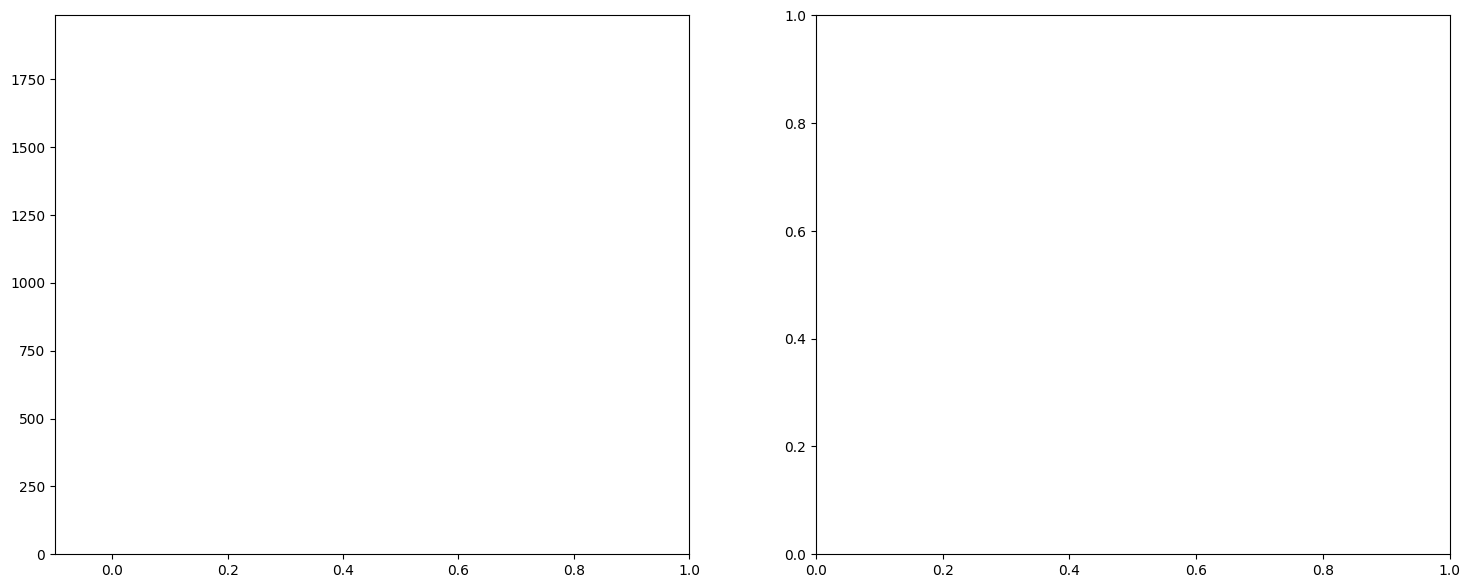

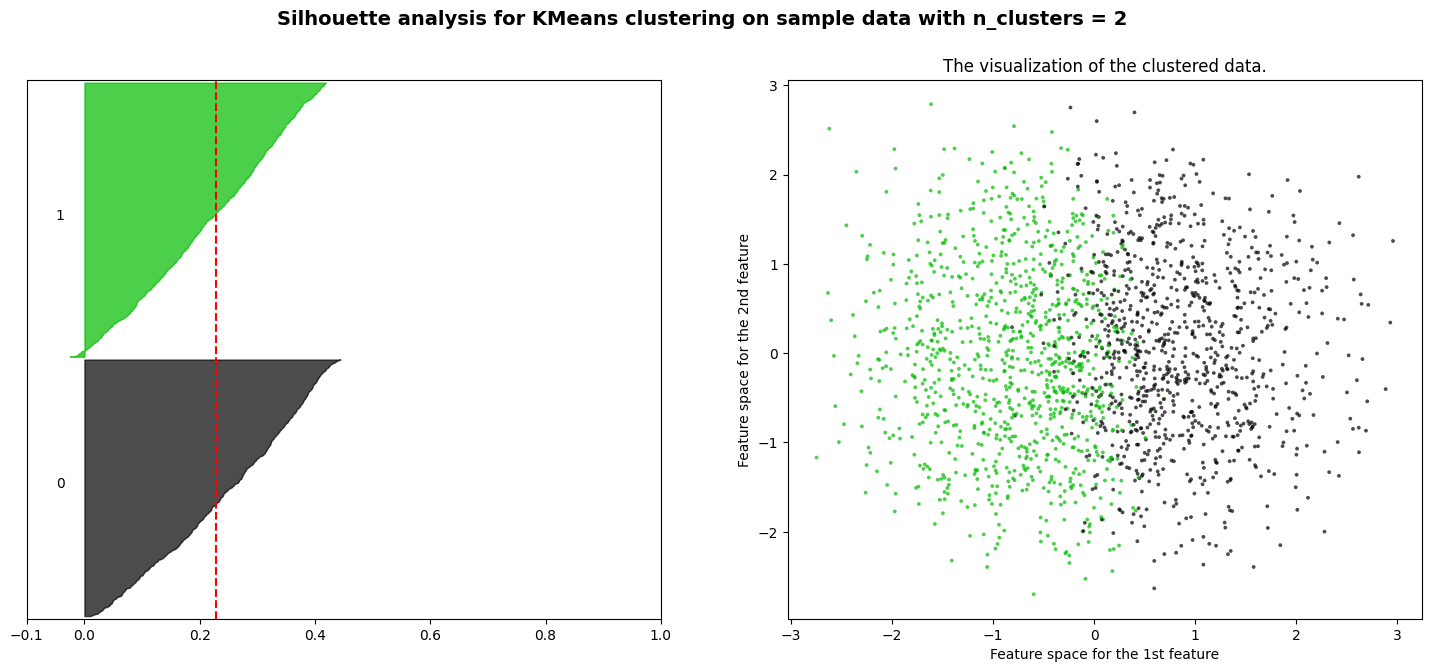

For n_clusters = 3 The average silhouette_score is : 0.23562607934338797


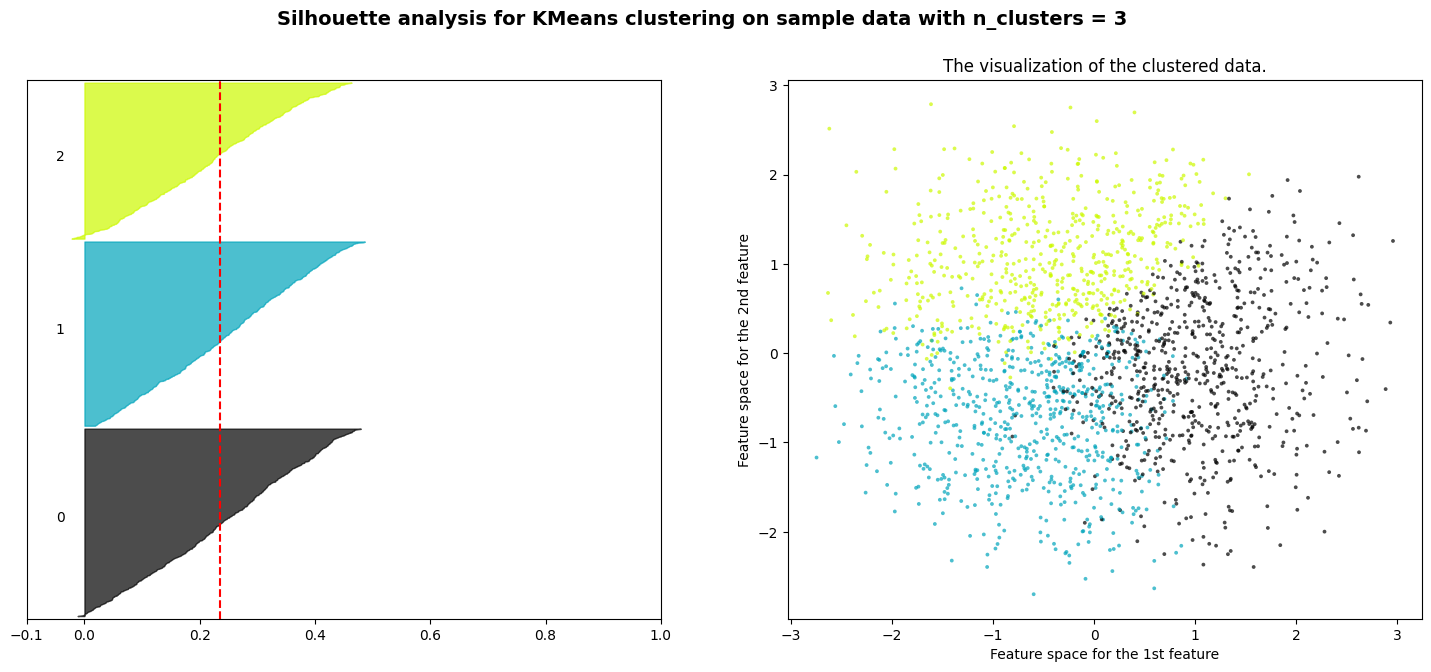

For n_clusters = 4 The average silhouette_score is : 0.25025931292524184


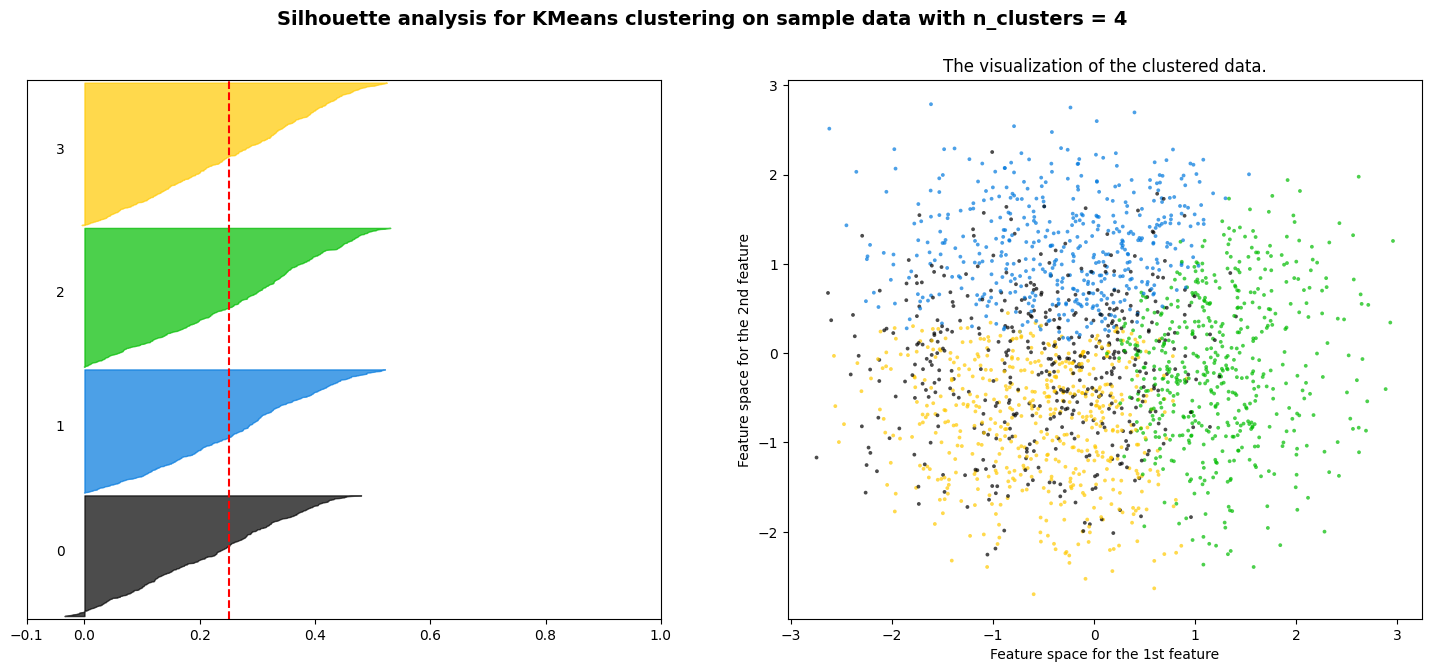

For n_clusters = 5 The average silhouette_score is : 0.24433505794615368


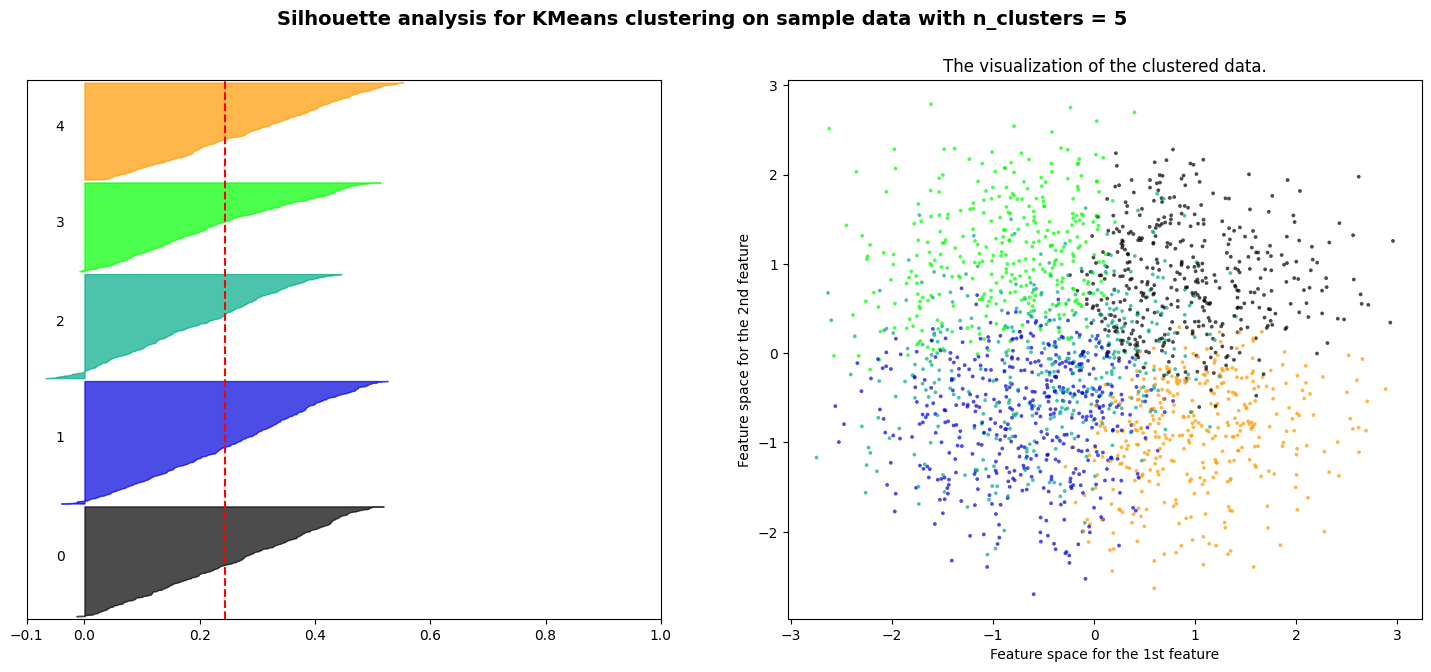

For n_clusters = 6 The average silhouette_score is : 0.2598924536483433


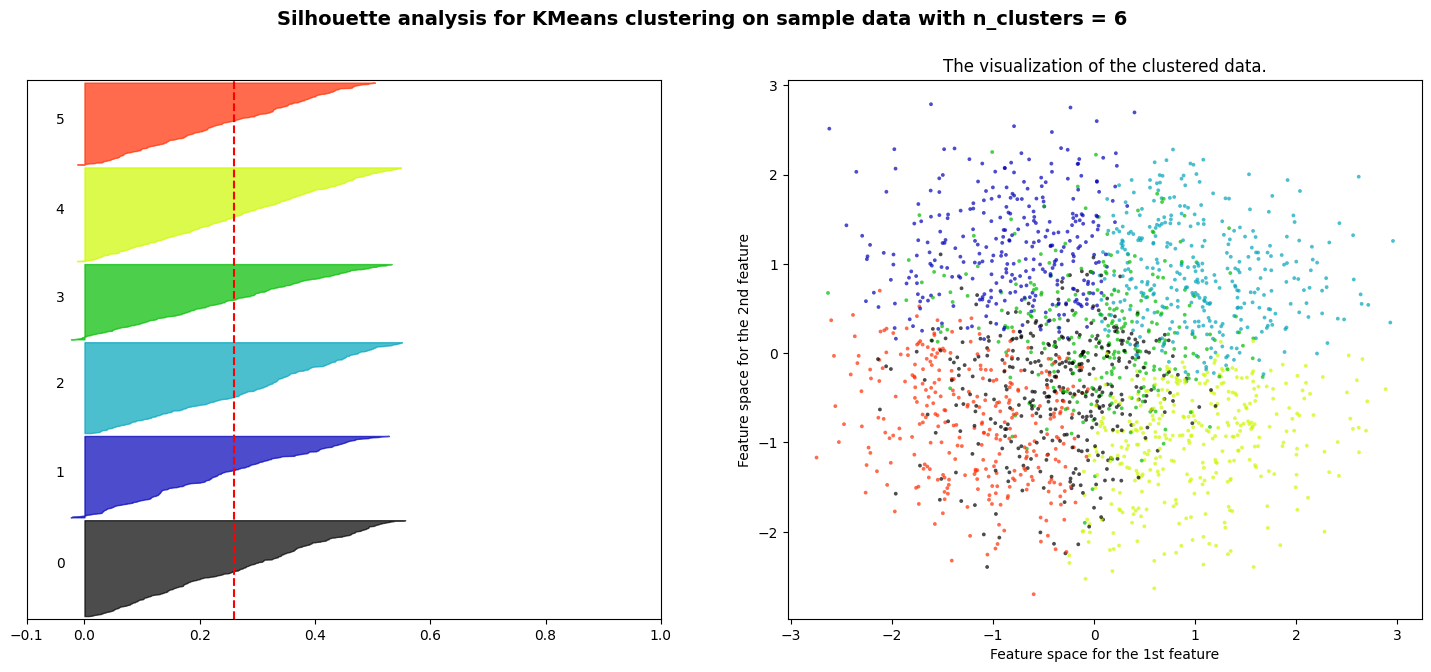

For n_clusters = 7 The average silhouette_score is : 0.24660078751549003


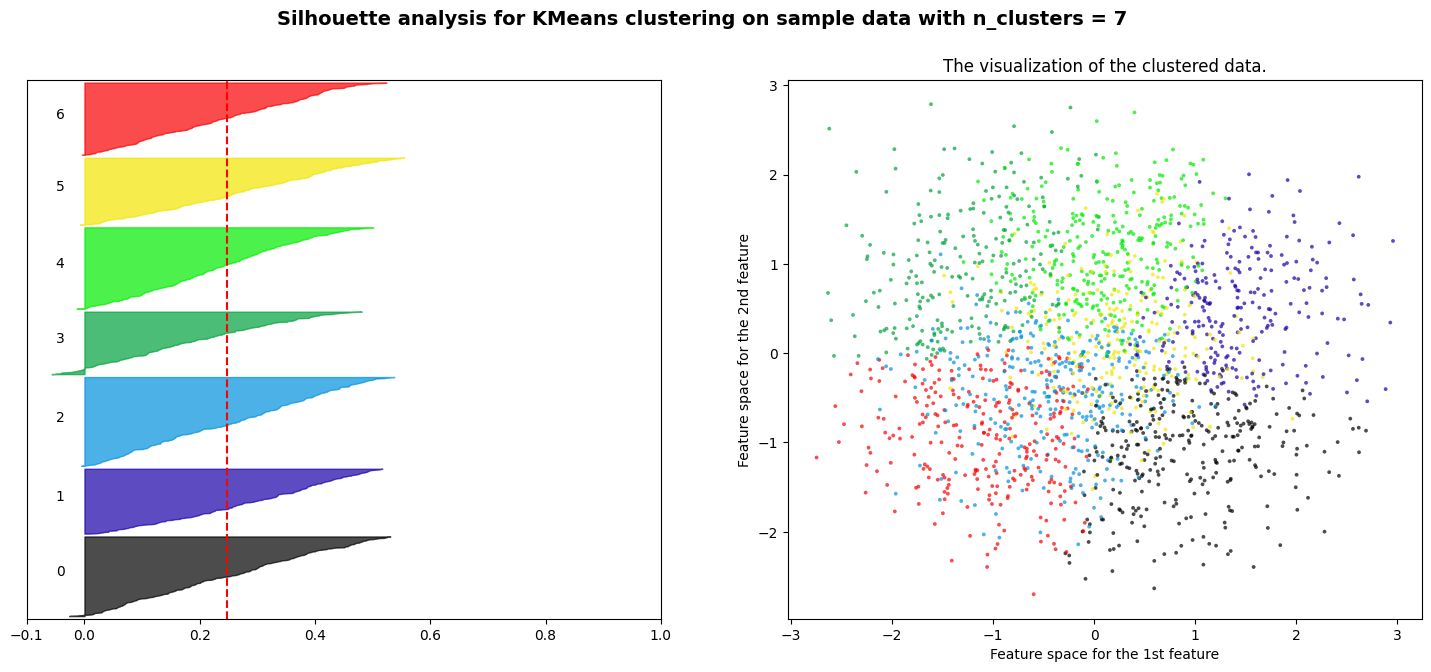

For n_clusters = 8 The average silhouette_score is : 0.2376615692662903


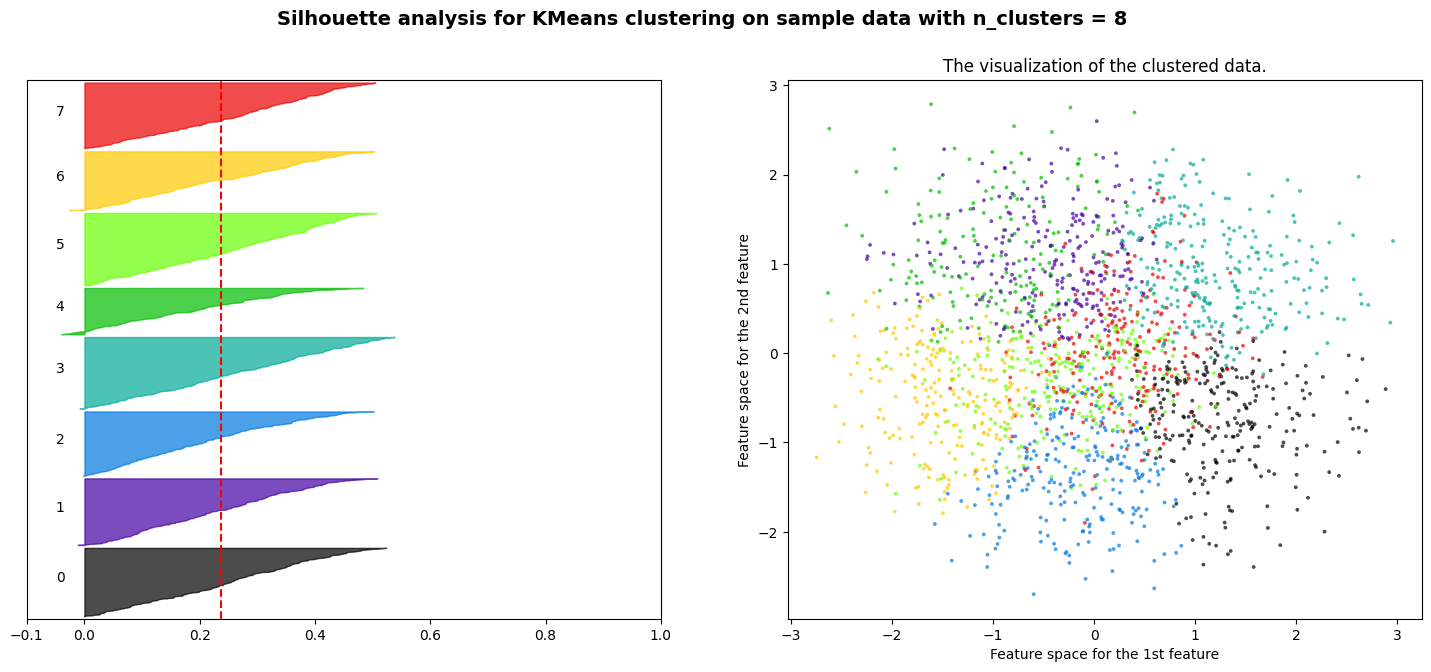

For n_clusters = 9 The average silhouette_score is : 0.24316340888129348


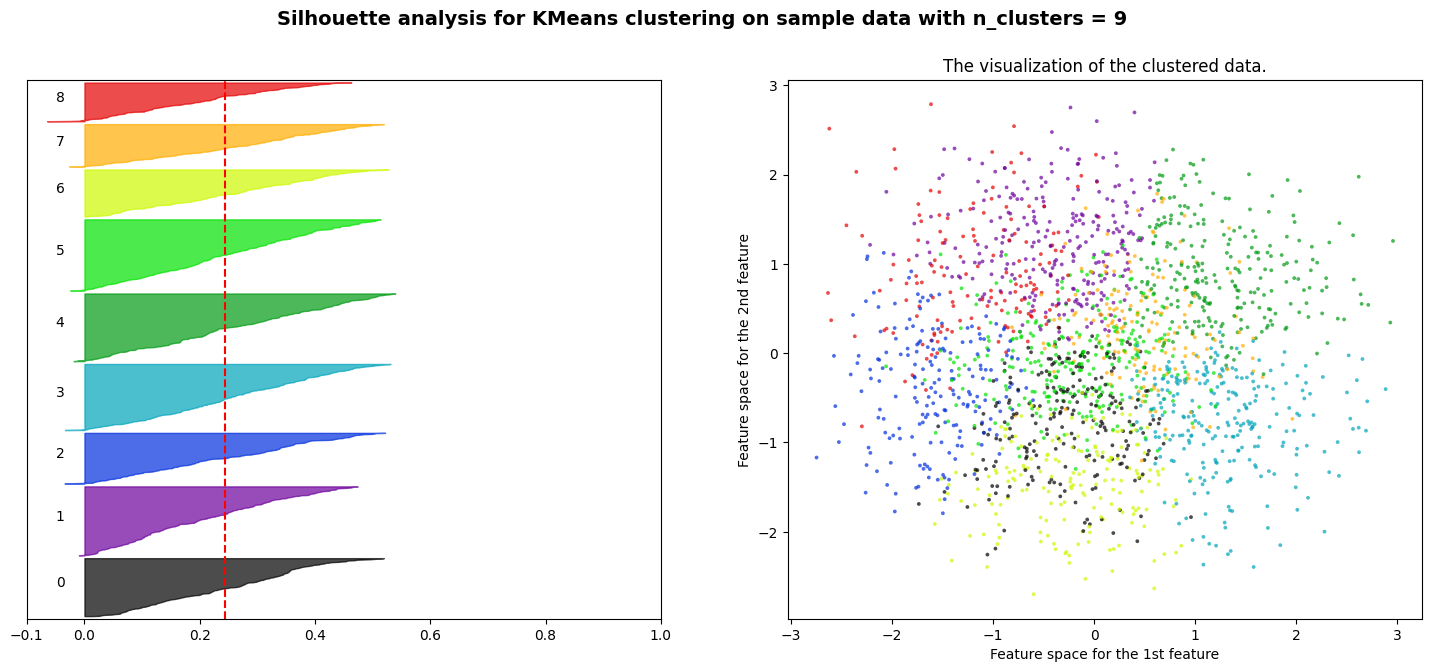

For n_clusters = 10 The average silhouette_score is : 0.23928958285710156


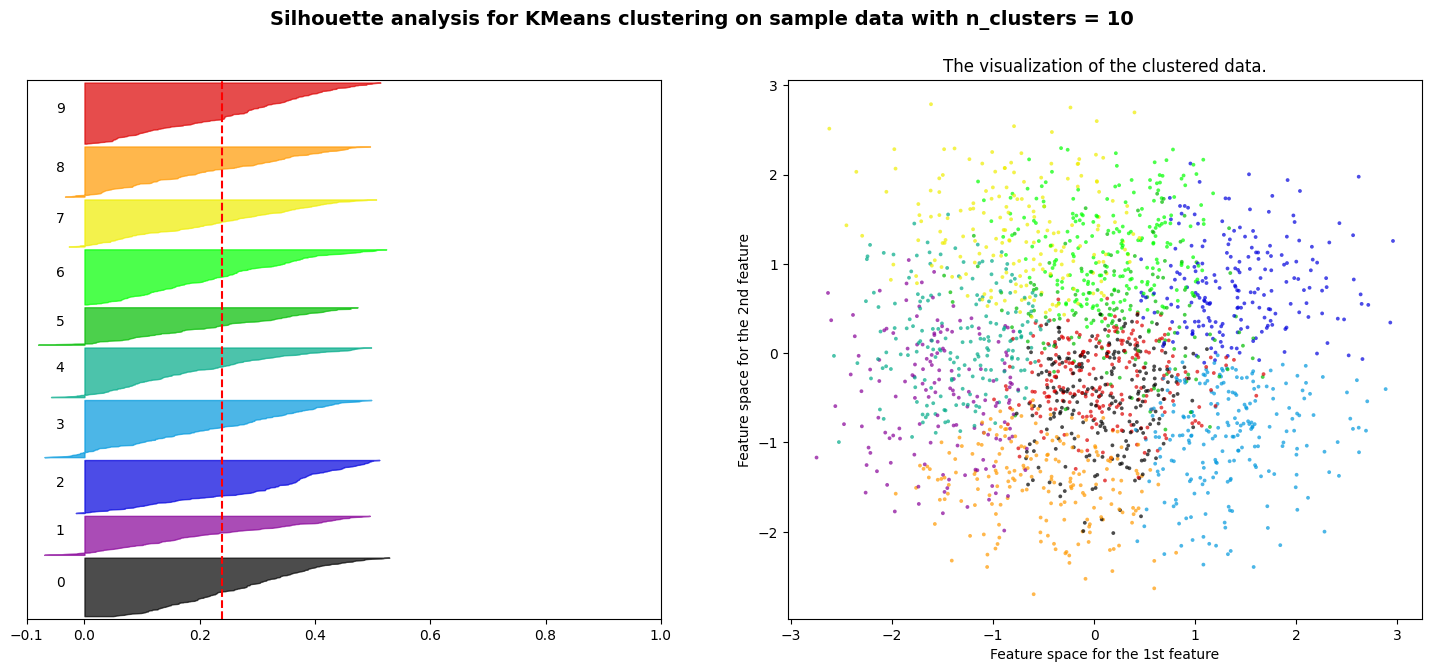

In [35]:
plot_silhouette(KMeans,k_values,data_pca ,'KMeans')

In [36]:
# KMeans Clustering 
kmeans6 = KMeans(n_clusters=6, random_state=42)

# Fit the KMeans model on train_ds
kmeans6.fit(df_transformed)

# Obtain cluster labels and centroids
labels = kmeans6.labels_
centroids = kmeans6.cluster_centers_

# CLUSTER VISUALIZATION

In [37]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_pca[:, 0], y=data_pca[:, 1], z=data_pca[:, 2], 
    color=labels,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['red', 'blue'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

In [38]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_pca[:, 0], y=data_pca[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['red', 'blue'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

# COMBINE ALL PROCESS INTO PIPELINE

In [39]:
all_process = Pipeline([
    ("preprocess", preprocessor),
    ("pca", pca),
    ("clustering", kmeans6),
])

# Fit the pipeline on the df DataFrame
all_process.fit(df)

# Assign the cluster labels to a new column 'Clustering'
df['Clustering'] = kmeans6.labels_

# RESULT

In [40]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Profession']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual Income ($)',
                                                   'Spending Score (1-100)',
                                                   'Work Experience',
                                                   'Family Size'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering', KMeans(n_clusters=6, random_state=42))])

In [41]:
df

Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0       Male   19              15000                      39     Healthcare   
1       Male   21              35000                      81       Engineer   
2     Female   20              86000                       6       Engineer   
3     Female   23              59000                      77         Lawyer   
4     Female   31              38000                      40  Entertainment   
...      ...  ...                ...                     ...            ...   
1995  Female   71             184387                      40         Artist   
1996  Female   91              73158                      32         Doctor   
1997    Male   87              90961                      14     Healthcare   
1998    Male   77             182109                       4      Executive   
1999    Male   90             110610                      52  Entertainment   

      Work Experience  Family Size  Clustering  
0                   1            4           4  
1                   3            3           4  
2                   1            1           1  
3                   0            2           4  
4                   2            6           1  
...               ...          ...         ...  
1995                8            7           0  
1996                7            7           0  
1997                9            2           5  
1998                7            2           0  
1999                5            2           1  

[1965 rows x 8 columns]

# OVERALL CONCLUSION


The process serves several main functions:

`Preprocessing:` The preprocessing stage aims to prepare the data before analysis or modeling. In the given pipeline, preprocessing is performed using the ColumnTransformer, which allows applying different transformations to different columns. In this example, one-hot encoding is applied to the 'Gender' and 'Profession' columns, while standard scaling is applied to numerical columns such as 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', and 'Family Size'. Preprocessing helps to address scale and data type differences in the dataset and prepares the data to meet the requirements of subsequent analysis.

`Principal Component Analysis (PCA):` The PCA stage aims to reduce the dimensionality of the data by projecting it onto a lower-dimensional feature space. In this example, PCA is applied with 3 components (3D) to reduce the dimensionality of the existing features. This can help in reducing data complexity, speeding up computation time, and facilitating the visualization of high-dimensional data.

`K-means Clustering:` The clustering stage utilizes the K-means algorithm to group the data into clusters based on similarity of characteristics. In this example, K-means clustering is performed with 6 clusters. Clustering can help in identifying patterns or groups within the data that may not be readily apparent, and it can be used for segmentation analysis or data grouping.

The PCA step reduces the dimensionality of the dataset by projecting it onto a lower-dimensional feature space. In this case, PCA is performed with three components, resulting in a 3D representation of the data. Dimensionality reduction can help in visualizing high-dimensional data and extracting the most relevant information while reducing computational complexity.

Finally, the K-means clustering step applies the K-means algorithm to group the data into clusters based on their similarities. In this example, six clusters are formed. Clustering allows for the identification of underlying patterns or groups within the data that may not be immediately apparent. It can be useful for segmentation analysis, customer profiling, or any task that involves grouping similar data points together.

By combining preprocessing, PCA, and K-means clustering, this pipeline enables a comprehensive analysis of the dataset, providing insights into the structure and patterns within the data. The specific conclusions and insights obtained from this pipeline will depend on the characteristics of the dataset and the specific goals of the analysis.

### SAVING ALL PROCESS

In [42]:
joblib.dump(all_process, "all_process.joblib")

['all_process.joblib']